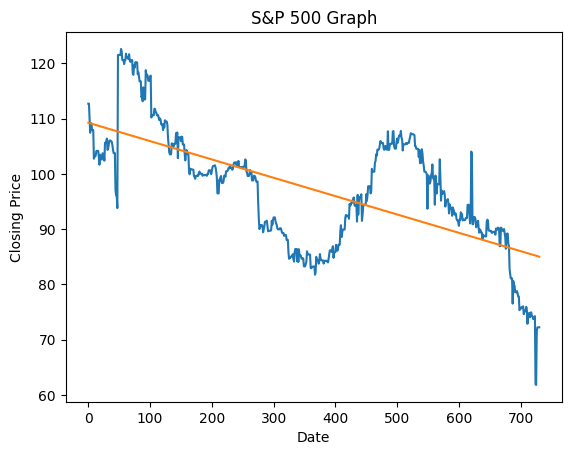

0.4152594996858977


In [48]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

def findCoefficientA(x, y):
    x = np.array(x)
    y = np.array(y)

    crossN = np.sum(x*y)-np.size(x)*np.mean(x)*np.mean(y)
    crossD = np.sum(x*x)-np.size(x)*np.mean(x)*np.mean(x)

    # aNumerator = np.size(x)*np.sum(x*y) - np.sum(x)*np.sum(y)
    # denominator = np.size(x)*np.sum(x*x)-(np.sum(x))*np.sum(x)

    # a = aNumerator/denominator
    a = crossN/crossD
    return a

def findCoefficientB(x, y, a):
    x = np.array(x)
    y = np.array(y)

    # bNumerator = np.sum(y)*np.sum(x*x) - np.sum(x)*np.sum(x*y)
    # denominator = np.size(x)*np.sum(x*x)-(np.sum(x))*np.sum(x)

    b = np.mean(y) - a*np.mean(x)
    return b

ds = pd.read_csv("sandp500.csv")

ds['Date'] = pd.to_datetime(ds['Date'])
ds = ds.sort_values(by = 'Date')

x = []
i = 0
for val in ds['Date']:
    x.append(i)
    i=i+1

y = []
for val in ds['Close']:
    y.append(val)

a = findCoefficientA(x,y)
b = findCoefficientB(x,y,a)

plt.plot(x, ds['Close'])

x = np.array(x)
y_pred = b+a*x
plt.plot(x,y_pred)

plt.title("S&P 500 Graph")
plt.xlabel("Date")
plt.ylabel("Closing Price")

plt.show()

r2 = r2_score(ds['Close'], y_pred)
print(r2)
